# Name : Surendra Kumar Kumawat
## **Task3 - Exploratory Data Analysis - Retail**
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit.

### Importing the necessary libraries  and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.linkedin.com/feed/update/urn:li:activity:6778650989986766848/?updateEntityUrn=urn%3Ali%3Afs_feedUpdate%3A%28V2%2Curn%3Ali%3Aactivity%3A6778650989986766848%29

In [3]:
file= 'SampleSuperstore.csv'
df = pd.read_csv(file)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()   #we can see that not a single value is null

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Finding correlation between different attributes

[]

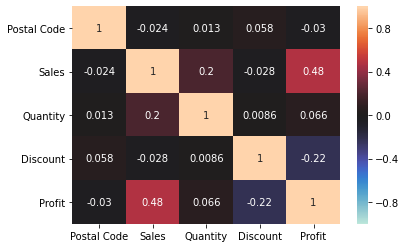

In [6]:
sns.heatmap(df.corr(),
            vmin=-1,
            vmax = 1,
            center = 0,
            annot = True)
plt.plot()

#### Here we can see that profit have a good correlation with Sales(Positive) and Discount(negative)

## Visualization

In [7]:
def getplots(data,  target_variable, sort_by, color, threshold_categories = 10):
    
    total_cols = [i for i in data.columns.values if len(data[i].unique()) < threshold_categories and len(data[i].unique()) > 1]
    
    fig = plt.figure(figsize = (20,20))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)

    plt.tight_layout(pad = 2.0)
    plt.show()

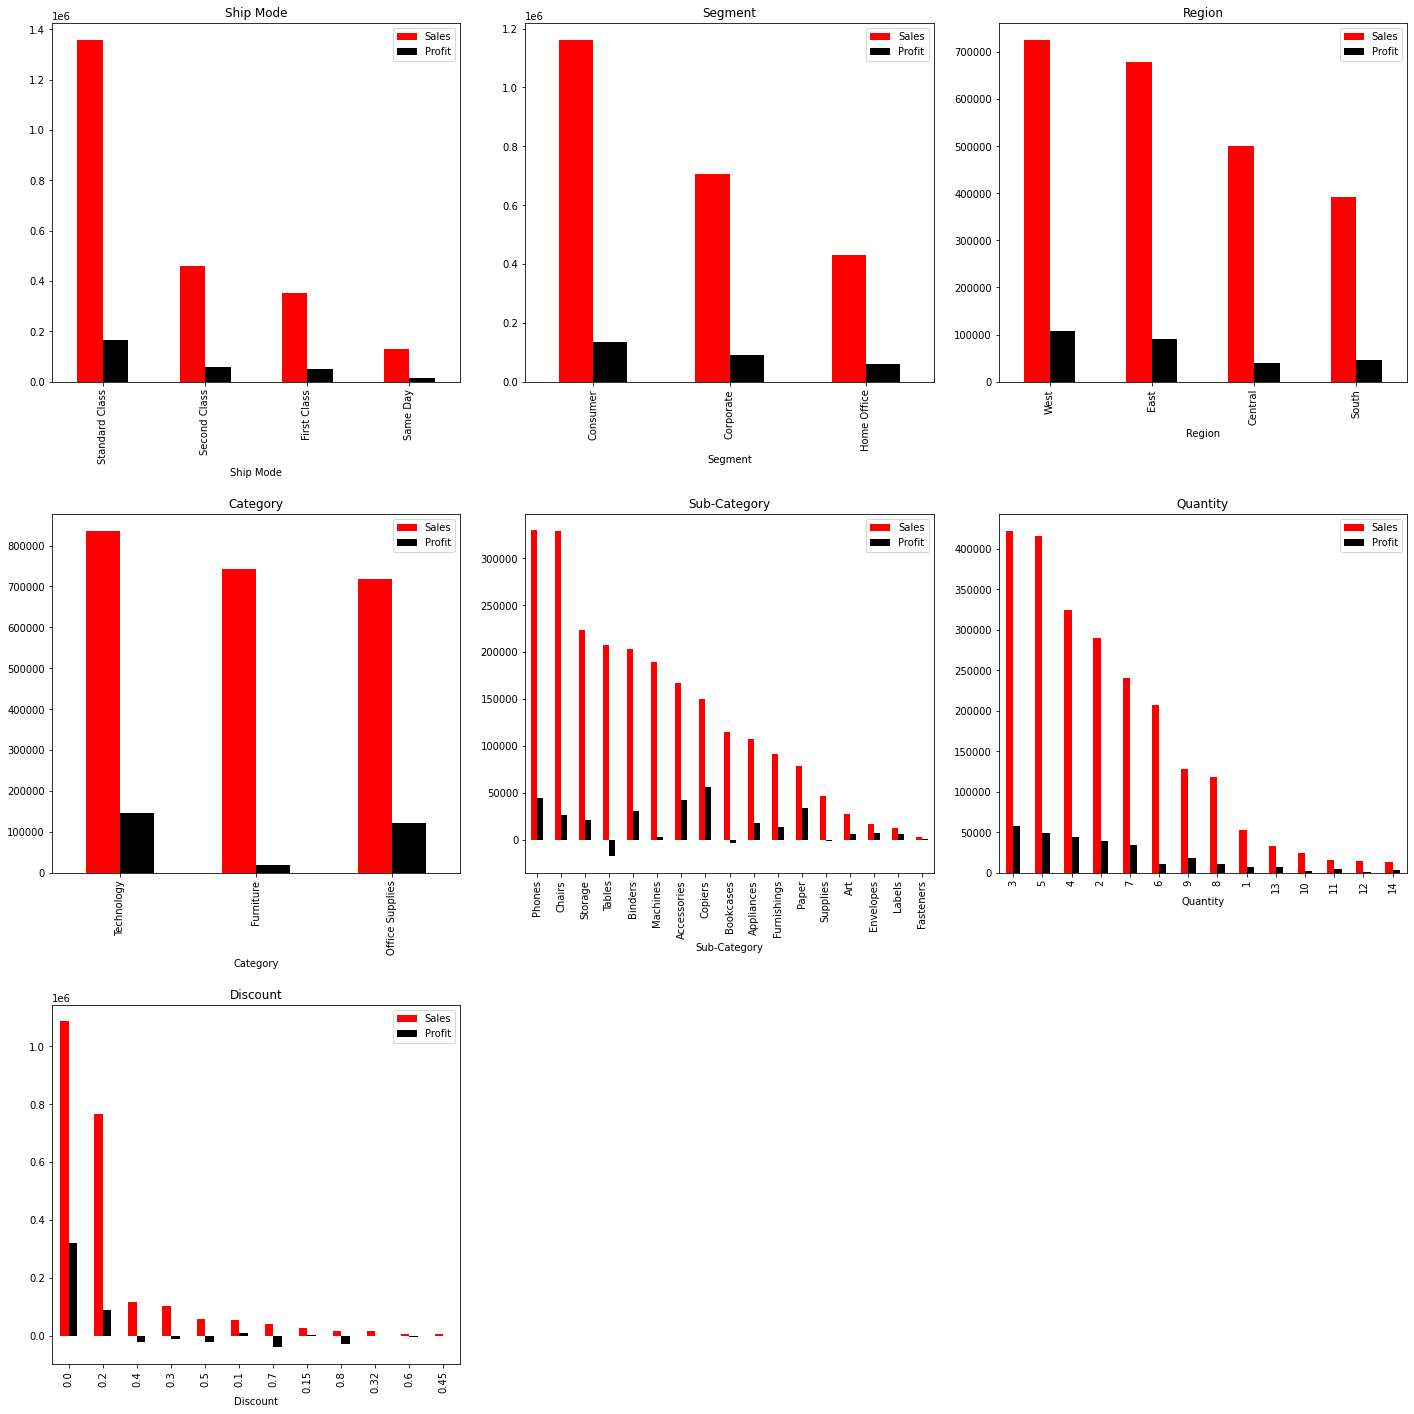

In [16]:
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["red", "black"]
getplots(df, target_variable, sort_by, color, num_categories)

#### Determining Profit % for all attributes

In [9]:
df['Profit %'] = (df["Profit"]/df["Sales"])*100
df[["Sub-Category", "Profit %"]].head()
print(df.groupby('Sub-Category')['Profit %', 'Sales'].mean().sort_values(['Profit %'], ascending =False).head(), "\n\n")
print(df.groupby('Ship Mode')['Profit %', 'Sales'].mean().sort_values(['Profit %'], ascending =False).head(), "\n\n")
print(df.groupby('Segment')['Profit %', 'Sales'].mean().sort_values(['Profit %'], ascending =False).head(), "\n\n")
print(df.groupby('Region')['Profit %', 'Sales'].mean().sort_values(['Profit %'], ascending =False).head(), "\n\n")
print(df.groupby('Category')['Profit %', 'Sales'].mean().sort_values(['Profit %'], ascending =False).head(), "\n\n")
print(df.groupby('Quantity')['Profit %', 'Sales'].mean().sort_values(['Profit %'], ascending =False).head(), "\n\n")
print(df.groupby('Discount')['Profit %', 'Sales'].mean().sort_values(['Profit %'], ascending =False).head(), "\n\n")

               Profit %        Sales
Sub-Category                        
Labels        42.966346    34.303055
Paper         42.560036    57.284092
Envelopes     42.313976    64.867724
Copiers       31.719363  2198.941618
Fasteners     29.917051    13.936774 


                 Profit %       Sales
Ship Mode                            
Second Class    15.020878  236.089239
Same Day        13.815135  236.396179
First Class     11.594781  228.497024
Standard Class  11.007329  227.583067 


              Profit %       Sales
Segment                           
Home Office  14.286959  240.972041
Corporate    12.120261  233.823300
Consumer     11.204952  223.733644 


          Profit %       Sales
Region                        
West     21.948662  226.493233
East     16.722696  238.336110
South    16.351903  241.803645
Central -10.407294  215.772661 


                  Profit %       Sales
Category                              
Technology       15.613805  452.709276
Office Supplies  13.803

## Observation from plots and Profit %
1) The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers.      
2) The profits for the Office Supplies is high, but the sales of the Office Supplies is less. So, we should focus on increasing the sales for Office Supplies.       
3) If we are not offering any discount, the profit is high as well as the sales is also high.      
4) Profit for Central Region is not good even we are getting equivalent amount of sale.     
5) Profit is not much depending on Shiping mode and Segment.

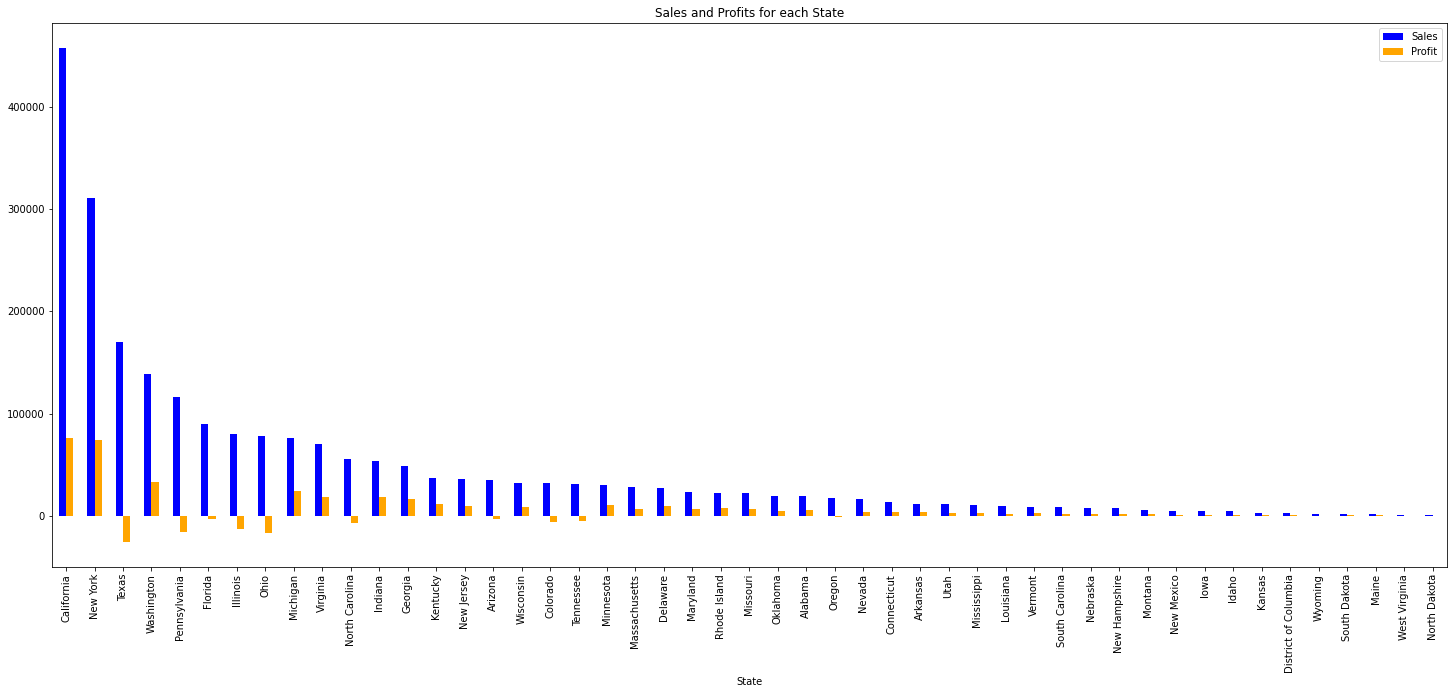

In [10]:
plt.rcParams["figure.figsize"] = [25,10]
df.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "orange"])
plt.title("Sales and Profits for each State")
plt.show()

In [11]:
df.groupby("State")['Discount'].sum().sort_values(ascending = False)

State
Texas                   364.64
Pennsylvania            192.90
Illinois                191.90
Ohio                    152.40
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.80
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Delaware                  0.60
New Jersey                0.60
Connecticut               0.60
Maryland                  0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Minnesota                 0.00
Georgia                   0.00
Virginia                  0.00
Arkansas                  0.00
Ve

#### Now we can conclude two points
1). The states which offered high dicsount, are getting less profit    
2). States with higher sales are getting less profit

#### Sales, Profit and Discount Distribution state wise

In [12]:
states_df = df.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_df

,Sales,Profit,Discount
State,,,
California,457687.6315,76381.3871,145.60
New York,310876.2710,74038.5486,62.40
Texas,170188.0458,-25729.3563,364.64
Washington,138641.2700,33402.6517,32.40
Pennsylvania,116511.9140,-15559.9603,192.90
Florida,89473.7080,-3399.3017,114.65
Illinois,80166.1010,-12607.8870,191.90
Ohio,78258.1360,-16971.3766,152.40
Michigan,76269.6140,24463.1876,1.80


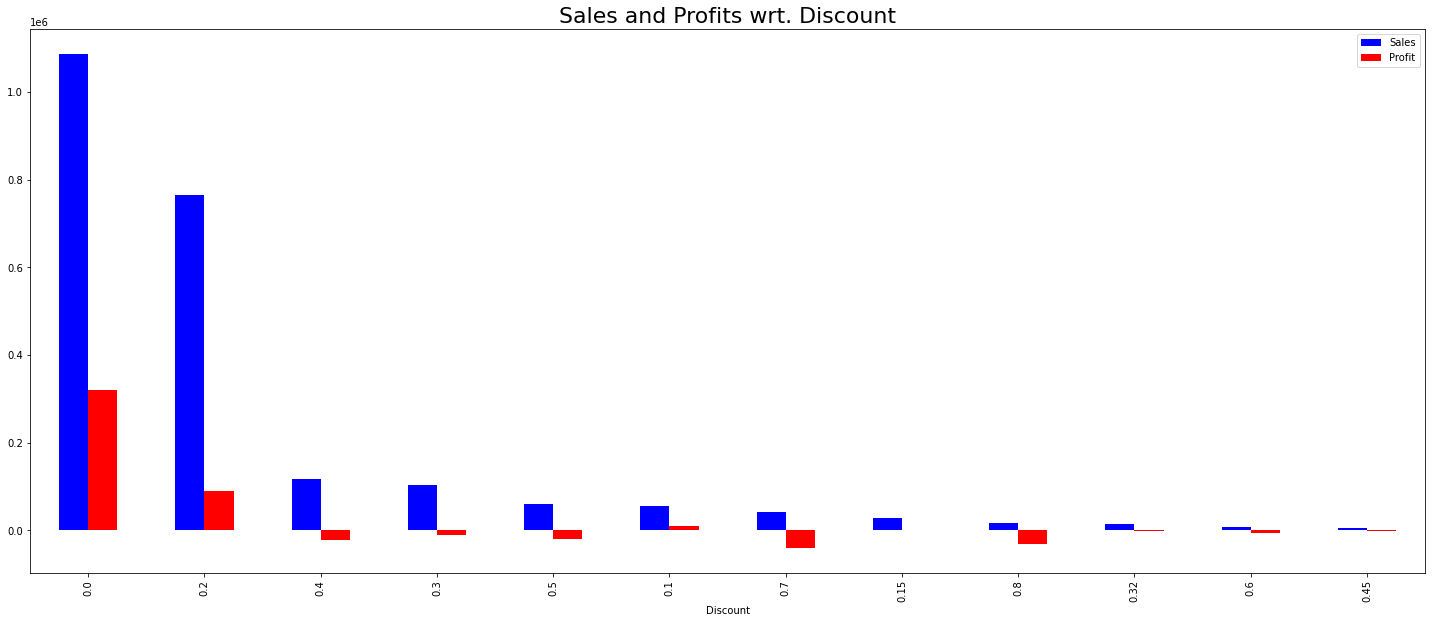

In [13]:
#plt.figure(figsize=(30,20))
df.groupby("Discount")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "r"])
plt.title("Sales and Profits wrt. Discount", fontsize=22)
plt.show()

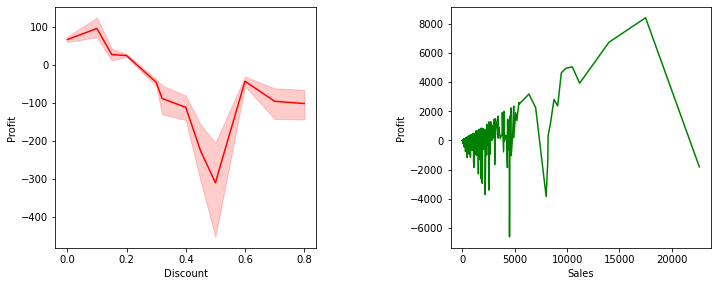

In [14]:
fig = plt.figure(figsize=(12,6))
a = fig.add_subplot(1,2,1)
sns.lineplot(x = "Discount", y = "Profit",ax=a, data = df, color = "red")
#plt.show()

#fig = plt.figure(figsize=(7,5))
b = fig.add_subplot(1,2,2)
sns.lineplot(x = "Sales", y = "Profit",ax=b, data = df, color = "green")
plt.tight_layout(pad = 8.0)
plt.show()

Here we can say that profit is decreasing with increament in Discount.    
Also, profit is not very much depending the nubmer of sales, there are other factors which have dominating effect on profit

# Summary


1) The profit generated by Office supplies category is more, but the sales for office supplies are less. So, we have to work on increasing the sales for Office Supplies Category.     
2) The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers.     
3) The company is facing Loss in top 25 states with highest number of sales.      
4) The company is facing loss in the states with high amount of Discount.       
5) Profit is not much depending on Shiping mode and Segment.